# SIR random wildlife vaccination
This is the Python version of program 8.2 from page 296 of "Modeling Infectious Diseases in humans and animals" by Keeling and Rohani. This is based on code written by Ilias Soumpasis.

In [1]:
import scipy.integrate as spi
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#parameters (in days)
beta=520/365.0; #transmission rate
gamma=1/7.0;   #recovery rate
mu=1/(10*365.0); #natural/birth rate

S0=0.1; #initial susceptible fraction
I0=2e-3; #initial infected fraction
R0=1-S0-I0 #intial recovered fraction

v0=0.002; #rate of random vaccination
tV=5*365; #time at which vaccination starts

ND=MaxTime=20*365;  #number of days
TS=1.0 #time step

INPUT = np.hstack((S0,I0,R0))

In [4]:
def diff_eqs(INP,t):  
	'''The main set of equations'''
	Y=np.zeros((3))
	V = INP   
	Y[0]= mu - beta*V[0]*V[1] - mu*V[0] - v * V[0]
	Y[1]= beta*V[0]*V[1] - gamma*V[1] - mu*V[1]
	Y[2]= v * V[0] + gamma*V[1] - mu*V[2]
	return Y   # For odeint

In [5]:

t_start = 0.0; t_end = tV; t_inc = TS
t_range1 = np.arange(t_start, t_end+t_inc, t_inc)
t_start = tV; t_end = ND; t_inc = TS
t_range2 = np.arange(tV, t_end+t_inc, t_inc)
T = np.hstack((t_range1, t_range2))

#firstly without vaccination
v=0
RES1 = spi.odeint(diff_eqs,INPUT,t_range1)

#now with vaccination
v=v0
RES2 = spi.odeint(diff_eqs,RES1[-1],t_range2)


S = np.hstack((RES1[:,0],RES2[:,0]))
I = np.hstack((RES1[:,1],RES2[:,1]))
R = np.hstack((RES1[:,2],RES2[:,2]))


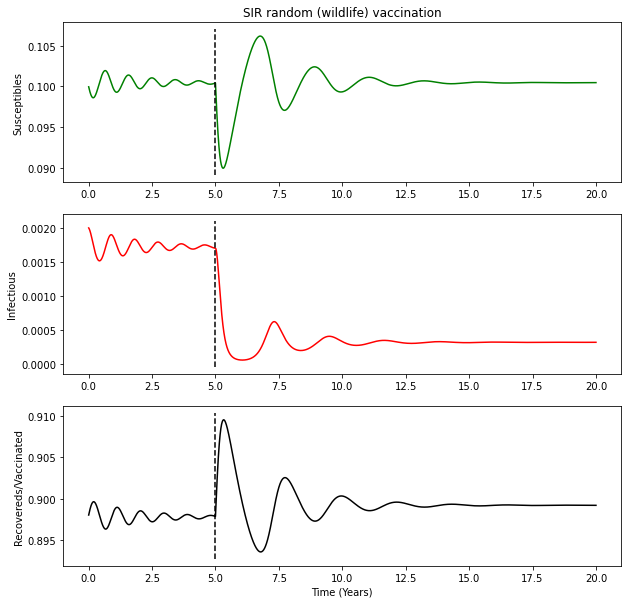

<Figure size 432x288 with 0 Axes>

In [6]:
#plotting
fig=plt.figure(figsize=(10,10))
plt.axis('off')
plt.title('SIR random (wildlife) vaccination')

fig.add_subplot(311)
plt.plot(T[1:,]/365.0, S[1:,], '-g')
ll=plt.ylim()
tVV=np.repeat([tV/365.],len(ll))
plt.plot(tVV, ll, '--k')
plt.ylabel('Susceptibles')

fig.add_subplot(312)
plt.plot(T[1:,]/365.0, I[1:,], '-r')
ll=plt.ylim()
tVV=np.repeat([tV/365.],len(ll))
plt.plot(tVV, ll, '--k')
plt.ylabel('Infectious')

fig.add_subplot(313)
plt.plot(T[1:,]/365.0, R[1:,], '-k')
ll=plt.ylim()
tVV=np.repeat([tV/365.],len(ll))
plt.plot(tVV, ll, '--k')
plt.ylabel('Recovereds/Vaccinated')

plt.xlabel('Time (Years)')

plt.show()
plt.savefig('SIR_random_vaccination.pdf')